In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [20]:
data_dir = '/kaggle/input/credit-card-application/Credit_Card_Applications.csv'
data = pd.read_csv(data_dir)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [21]:
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [22]:
data.duplicated().sum()

0

In [23]:
data = data.drop(columns=['CustomerID'])
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


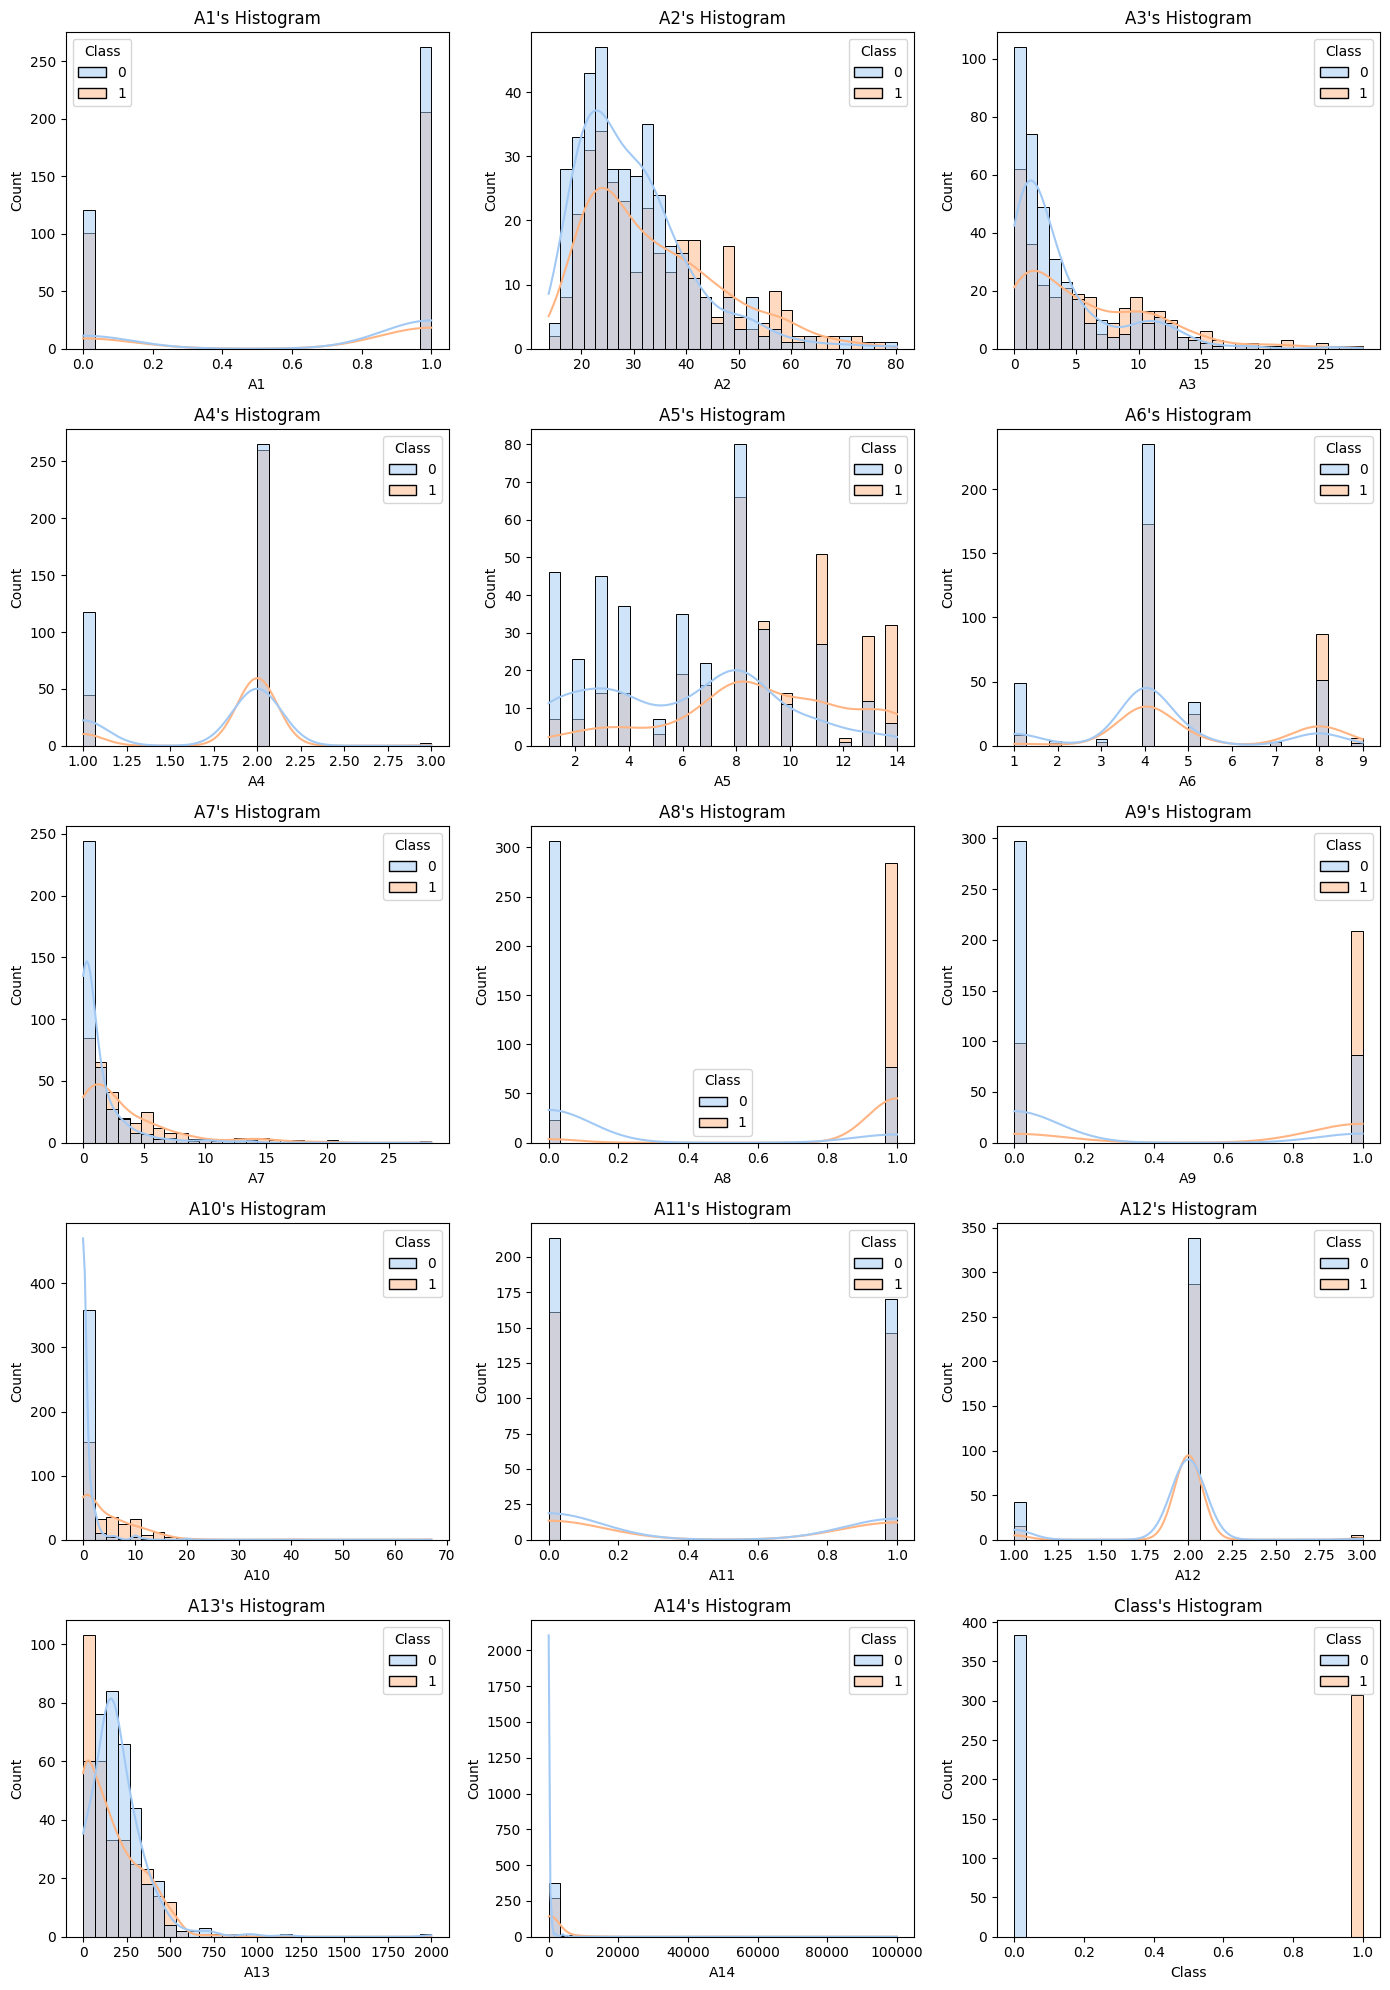

In [24]:
#Histplot
fig, axes = plt.subplots(5, 3, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.histplot(data, x = data[col],  bins = 30, kde = True, ax = axes[i], hue = 'Class', palette = 'pastel')
    axes[i].set_title(f'{col}\'s Histogram')

plt.tight_layout()
plt.show()

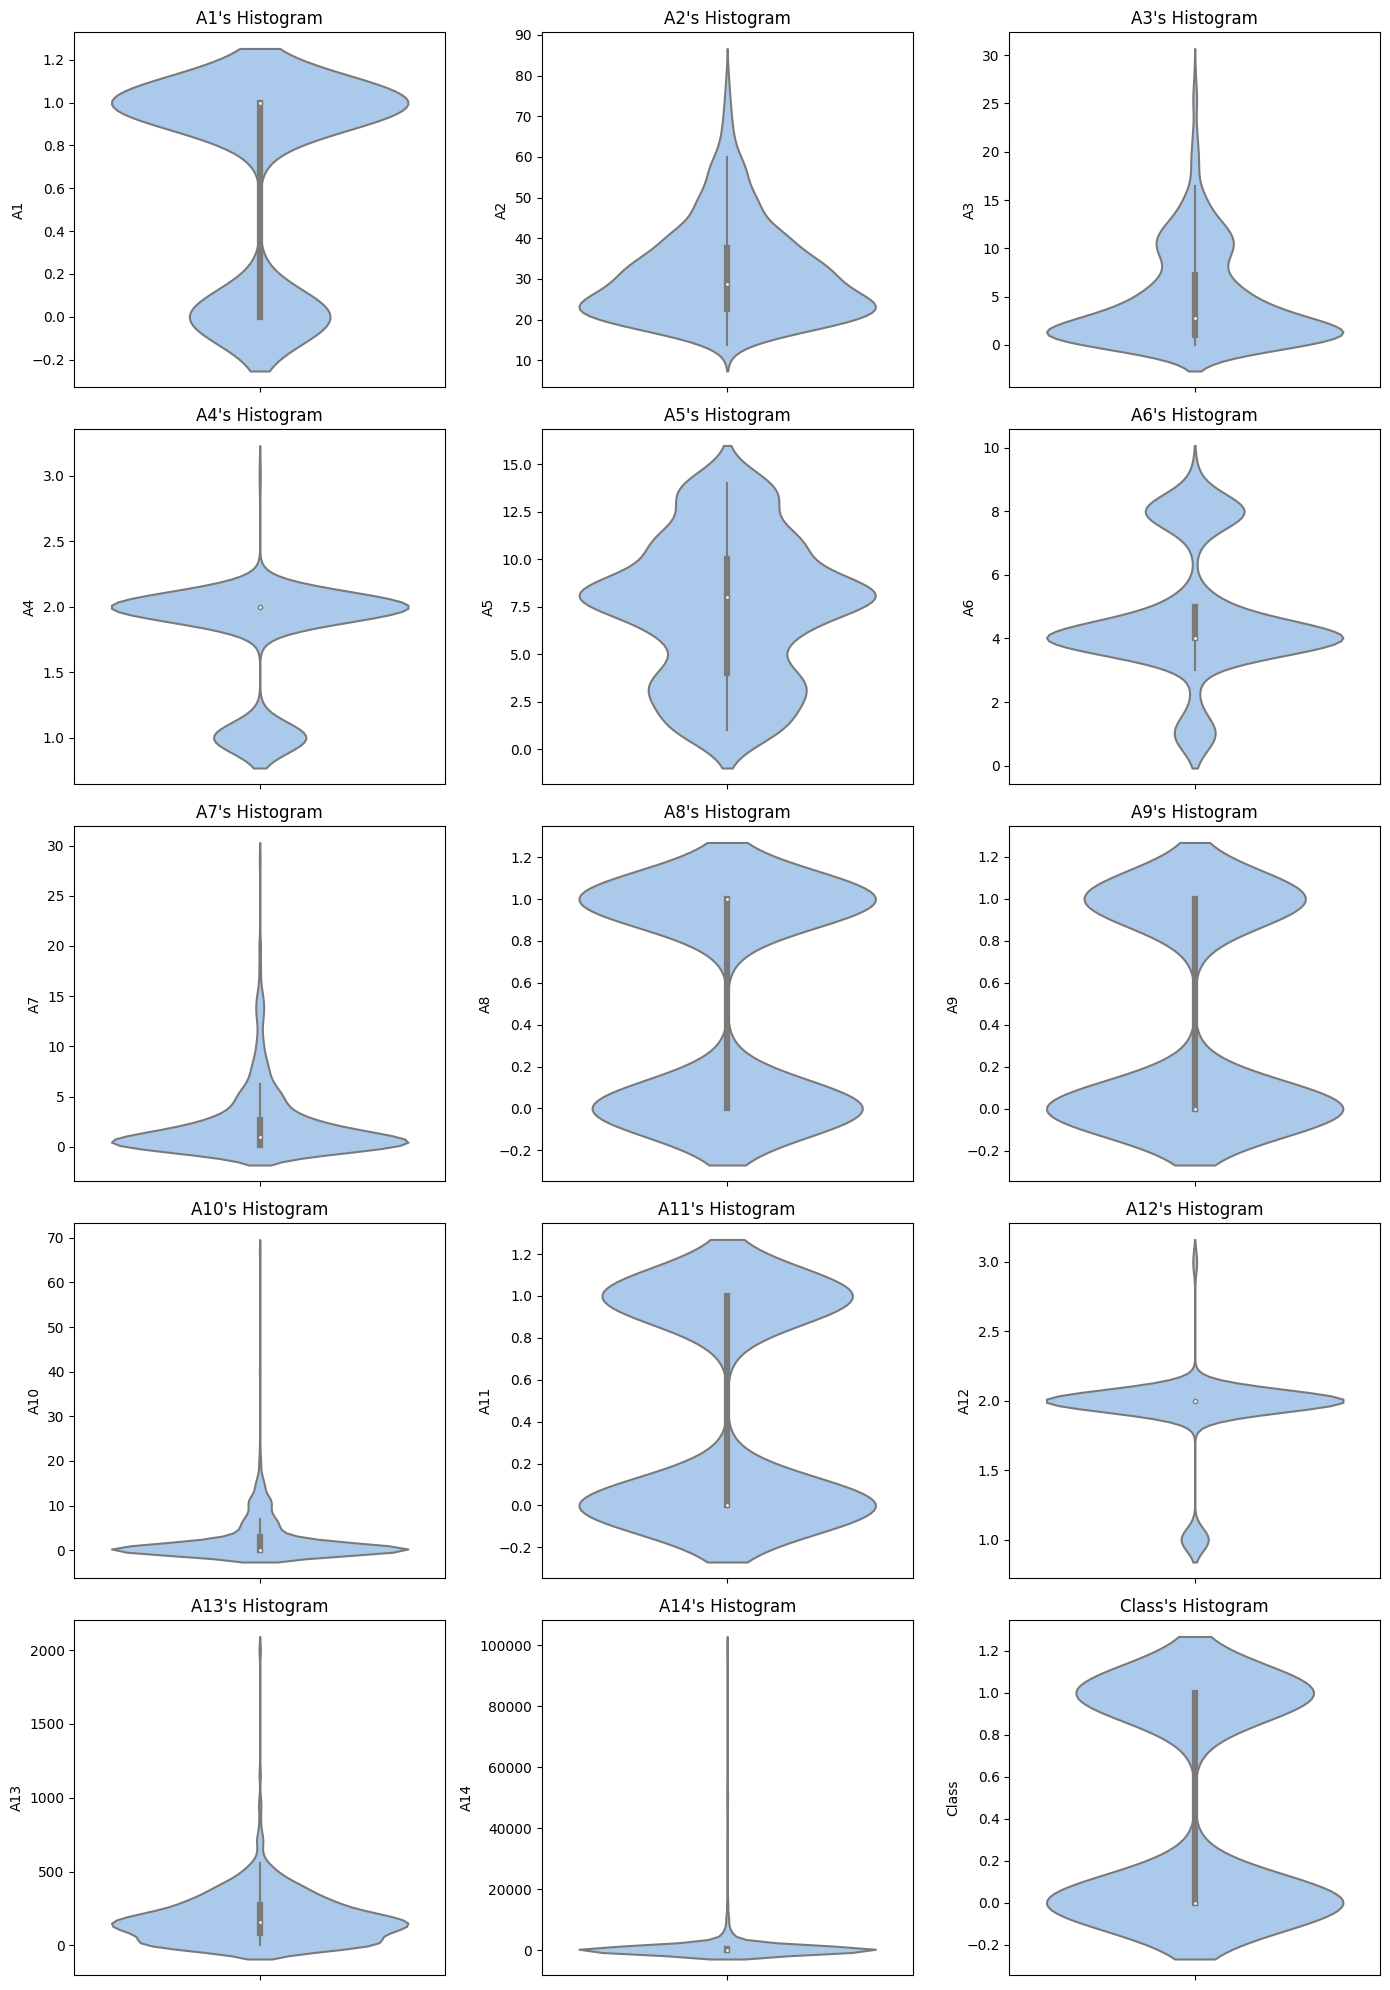

In [25]:
#Violinplot
fig, axes = plt.subplots(5, 3, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.violinplot(data, y = data[col], ax = axes[i], hue = 'Class', palette = 'pastel')
    axes[i].set_title(f'{col}\'s Histogram')

plt.tight_layout()
plt.show()

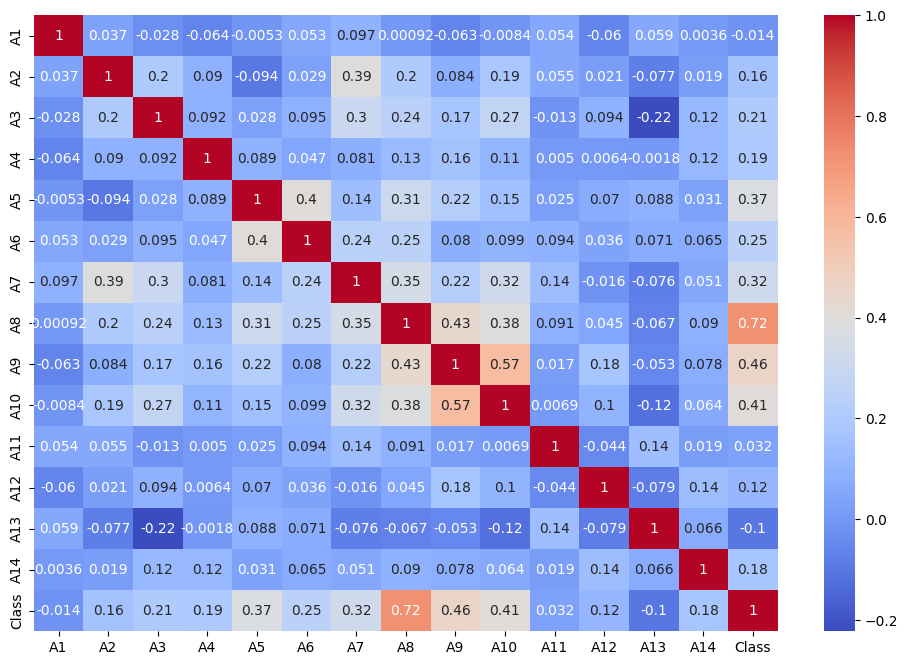

In [26]:
#Correlation matrix
cor = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()


# Models Training

In [27]:
y = data['Class']
x = data.drop(columns = ['Class'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 111)



In [28]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

In [29]:
%time

# Define parameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Random Forest": {
        "n_estimators": [100, 150, 200],
        "max_depth": [5, 10, 20],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-NN": {
        "n_neighbors": list(range(1, 20)),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 150, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [100, 150, 200],
        "learning_rate": [0.001, 0.01],
        "max_depth": [3, 5, 10]
    },
    "LightGBM": {
        "n_estimators": [100, 150, 200],
        "learning_rate": [0.001, 0.01],
        "max_depth": [-1, 5, 10],
        "num_leaves": [20, 30, 40]
    }
}

# Grid search function
def grid_search_models(models, param_grids, X_train, y_train):
    best_models = {}
    for name, model in models.items():
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}\n")
    return best_models


best_models = grid_search_models(models, param_grids, x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Best params for K-NN: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 237, number of negative: 315
[LightGBM] [Info] Auto-choosing row-wise multi

In [30]:
def evaluate_models(best_models, X_test, y_test):
    results = []
    
    for name, model in best_models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
        
        results.append({
            "Model": name,
            "Accuracy": round(acc, 4),
            "F1-score": round(f1, 4),
            "ROC AUC": round(roc_auc, 4) if roc_auc else "N/A"
        })
    
    return results

report = evaluate_models(best_models, x_test, y_test)

report = pd.DataFrame(report)
print(report)

                 Model  Accuracy  F1-score  ROC AUC
0  Logistic Regression    0.8478    0.8627   0.9309
1        Random Forest    0.8623    0.8652   0.9265
2                 K-NN    0.6957    0.6182   0.8366
3    Gradient Boosting    0.8551    0.8611   0.9315
4              XGBoost    0.8551    0.8592   0.9124
5             LightGBM    0.8623    0.8690   0.9307
